# 第2章 感知机 Perceptron

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的**线性分类模型**：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
M为误分类点的集合， 即$-y_i(w\cdot x_i+b) > 0$的点  
损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 数据集的线性可分性
存在某个超平面$S$能够将数据集$T$的正实例和负实例完全正确地划分开来，就称数据集$T$为线性可分数据集（linearly separable data set）; 否则称数据集$T$为线性不可分

### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import font_manager
font = font_manager.FontProperties(fname='/usr/share/fonts/truetype/unifont/unifont.ttf')
np.random.seed(12345)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, threshold=15,suppress=True)
%matplotlib inline

In [2]:
iris = load_iris()
# load_iris?
# Load and return the iris dataset (classification).

# The iris dataset is a classic and very easy multi-class classification
# dataset.

# =================   ==============
# Classes                          3
# Samples per class               50
# Samples total                  150
# Dimensionality                   4
# Features            real, positive
# =================   ==============
iris # 鸢尾花数据集 一组数据：花萼长、宽 花瓣 长、 宽； 共3类每类50组数据

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        ...,
        [6.5, 3. , 5.2, 2. ],
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]]),
 'target': array([0, 0, 0, ..., 2, 2, 2]),
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Corr

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target 
np.bincount(df['label'])

array([50, 50, 50])

In [4]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


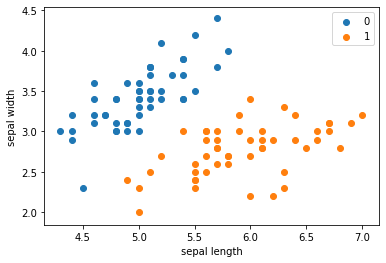

In [5]:
# 取第一类和第二类的sepal数据
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]]) 

In [7]:
X, y = data[:,:-1], data[:,-1]  #　Ｘ (length, width) 即 (x_1, x_2)； y :label (0 1)
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       ...,
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8]])

In [8]:
y = np.array([1 if i == 1 else -1 for i in y])  # 转为　１ -1的形式
y

array([-1, -1, -1, ...,  1,  1,  1])

## Perceptron

In [9]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        # w 系数初始化为1
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        # 偏置初始化为 0 
        self.b = 0
        # 学习率 0.1
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        m = len(X_train)
        is_wrong = False
        while not is_wrong:  # 数据集线性可分，可以一直进行
            wrong_count = 0
            data_index = list(range(m))  # [0 ,1 , 2, ... m-1]
            for _ in range(m):
                rand_index = int(np.random.uniform(0, len(data_index)))  #  随机取一个样本
                X = X_train[data_index[rand_index]]  # data_index[rand_index]对应 样本数据编号
                y = y_train[data_index[rand_index]]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)  # 1*1  1*2
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
                del(data_index[rand_index])  # 一个样本数据使用后，不会在使用它
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [10]:
perceptron = Model()
perceptron.fit(X, y)
perceptron.w

array([ 6.59, -8.46])

### 感知机学习算法的对偶形式
对偶形式的基本思想: 将$w$和$b$表示为实例$x_i$和标记$y_i$的线性组合的形式, 通过求解其系数而求得$w$和$b$.
使用梯度下降法, 对误分类点$(x_i, y_i)$通过
$$w := w + \eta y_{i}x_{i}$$

$$b := b + \eta y_{i}$$
逐步修改w 和b的值.  
设某一点$(x_i, y_i)$上修改了$n_i$次(即更新参数w和b的次数, 越是靠近分离超平面就容易误判, 在该点时更新参数的次数就越多), 则在该点w和b的增量分别是$n_i\eta y_ix_i$和$n_i\eta y_i$ 这样, 最后获得的w和b可表示为:
$$w = w_0 + \sum_{i=1}^N n_i\eta y_ix_i$$
$$b = b_0 + \sum_{i=1}^N n_i\eta y_i$$
可以令初始$w_0$和$b_0$都为零

这样的话, 感知机模型:
$$f(x) = sign(w\cdot x +b) = sign(\sum_{j=1}^N n_j\eta y_jx_j\cdot x + \sum_{j=1}^N n_j\eta y_j)$$
学习的目标由w和b变为$n_j$
训练过程:

1. 初始时 $\forall n_i = 0$
1. 选取$(x_i, y_i)$
1. 如果$y_i\left(\sum_{j=1}^N n_j\eta y_jx_j\cdot x_i + \sum_{j=1}^N n_j\eta y_j\right) \leq 0$, 更新 $n_i = n_i + 1$
1. 转至2 直到没有误分类的点

从3中看出, 训练实例仅以内积的形式出现.可以预先将训练集中实例间的内积计算出来并以矩阵的形式存储, 也就是Gram矩阵.
$$G = [x_i \cdot x_j ]_{N \times N}$$
判别式可以写成:
$y_i\left(\sum_{j=1}^N n_jy_jG[i]+ \eta\sum_{j=1}^N n_jy_j \right) \leq 0$

In [11]:
class Model_Dual():
    def __init__(self, X, y):
        self.l_rate = 0.1
        self.w = np.zeros(len(data[0] -1))
        self.b = 0
        self.X = X
        self.y = y
        self.n = [0] * len(X)
        self.gram = np.inner(self.X, self.X)
    
    def sign(self, i):
        return np.sum(self.y * self.n * self.gram[i]) + np.sum(self.y * self.n)
    
    def fit(self):
        no_error = False      
        while not no_error:
            wrong_count = 0
            for i in range(len(self.X)):
                x = self.X[i]
                y = self.y[i]
                if y * self.sign(i) <= 0:
                    self.n[i] += 1
                    wrong_count += 1
            if wrong_count == 0:
                no_error = True
        self.b = np.sum(self.n * self.y) * self.l_rate
        self.w = np.sum((self.n * self.y)[:, np.newaxis] * self.X, axis=0) * self.l_rate

In [12]:
perceptron = Model_Dual(X, y)
perceptron.fit()
perceptron.w

array([  7.9 , -10.07])

In [13]:
perceptron.b

-12.4

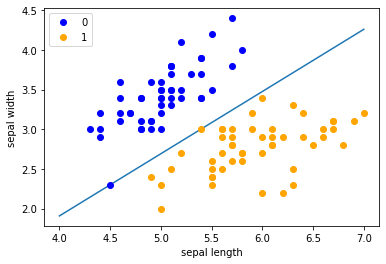

In [14]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

**Perceptron（感知器）** 是一种分类算法，与SGDClassifier共享相同的基础实现
 *   不需要设置学习率（learning rate）。
 *   不需要正则化处理。
 *   仅使用错误样本更新模型。

最后一点表明使用合页损失（hinge loss）的感知机比 SGD 略快，所得模型更稀疏。  
Perceptron()就等价于   
SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)


参数列表
----------

- penalty : None, 'l2' or 'l1' or 'elasticnet'
    The penalty (aka regularization term) to be used. Defaults to None.  
    罚项,即正则化项, 默认无


- alpha : float
    Constant that multiplies the regularization term if regularization is
    used. Defaults to 0.0001  
    带有罚项penalty term时的调整系数(默认0.0001). 经验风险+调整系数 * 正则化项


- fit_intercept : bool
    Whether the intercept should be estimated or not. If False, the
    data is assumed to be already centered. Defaults to True.
    是否估计截距.如果为False，则假定数据已经居中。默认为True。
    

- max_iter : int, optional (default=1000)
    The maximum number of passes over the training data (aka epochs).
    It only impacts the behavior in the ``fit`` method, and not the
    `partial_fit`.   
    计算时的最大迭代次数(默认1000), 会影响`fit`方法, 不会影响`partial_fit`方法  
    .. versionadded:: 0.19


- tol : float or None, optional (default=1e-3)
    The stopping criterion. If it is not None, the iterations will stop
    when (loss > previous_loss - tol).  
    规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代(默认1e-3)  
    .. versionadded:: 0.19


- shuffle : bool, optional, default True
    Whether or not the training data should be shuffled after each epoch.  
    每次迭代数据时是否重新整理数据集


- verbose : integer, optional
    The verbosity level  
    详细程度


- eta0 : double
    Constant by which the updates are multiplied. Defaults to 1.  
    更新乘以的常数。默认为1。


- n_jobs : int or None, optional (default=None)
    The number of CPUs to use to do the OVA (One Versus All, for
    multi-class problems) computation.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.
    用于执行OVA（对于多类问题而言，是一个对所有）的CPU数量。 


- random_state : int, RandomState instance or None, optional, default None
    The seed of the pseudo random number generator to use when shuffling
    the data.  If int, random_state is the seed used by the random number
    generator; If RandomState instance, random_state is the random number
    generator; If None, the random number generator is the RandomState
    instance used by `np.random`.  
    `shuffle`选项使用时, 伪随机数生成器的种子 默认`np.random`


- early_stopping : bool, default=False
    Whether to use early stopping to terminate training when validation.
    score is not improving. If set to True, it will automatically set aside
    a stratified fraction of training data as validation and terminate
    training when validation score is not improving by at least tol for
    n_iter_no_change consecutive epochs.  
    验证时是否使用`early_stopping`终止训练。设置True时, 自动将数据集分为训练集和验证集, 并在连续`n_iter_no_change`次迭代的验证分数提高少于`tol`时终止训练  
    .. versionadded:: 0.20


- validation_fraction : float, default=0.1
    The proportion of training data to set aside as validation set for
    early stopping. Must be between 0 and 1.
    Only used if early_stopping is True.  
    验证集的比例(默认0.1, 即10%), 启用`early_stopping`才有效  
    .. versionadded:: 0.20

- n_iter_no_change : int, default=5
    Number of iterations with no improvement to wait before early stopping.  
    迭代`n_iter_no_change`(默认5)次后, 模型没有提高就终止  
    .. versionadded:: 0.20


- class_weight : dict, {class_label: weight} or "balanced" or None, optional
    Preset for the class_weight fit parameter.  
    使用class_weight fit方式时的每个类别的权重设置

        Weights associated with classes. If not given, all classes
        are supposed to have weight one.

        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``


- warm_start : bool, optional
    When set to True, reuse the solution of the previous call to fit as
    initialization, otherwise, just erase the previous solution. See
    :term:`the Glossary <warm_start>`.  
    当将估计量重复拟合到同一数据集上时，但对于多个参数值（例如在网格搜索中找到使性能最大化的值），可以重用从先前参数值中学到的模型内容，从而节省时间。当warm_start为true时，现有的拟合模型属性用于在随后的拟合调用中初始化新模型。 
    

Attributes
----------
- coef_ : array, shape = [1, n_features] if n_classes == 2 else [n_classes, n_features]
    Weights assigned to the features.  
    变量X的weights, 即系数(二类分类时维度:1*特征数)

- intercept_ : array, shape = [1] if n_classes == 2 else [n_classes]
    Constants in decision function.  
    决策函数中的常数项

- n_iter_ : int
    The actual number of iterations to reach the stopping criterion. For multiclass fits, it is the maximum over every binary fit. 
    达到停止标准的实际迭代次数。对于多类拟合，它是每个二进制拟合的最大值。


Methods
--------

- decision_function(self, X)	Predict confidence scores for samples.


- densify(self)	 Convert coefficient matrix to dense array format.


- fit(self, X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.


- get_params(self[, deep])	Get parameters for this estimator.


- partial_fit(self, X, y[, classes, sample_weight])	Perform one epoch of stochastic gradient descent on given samples.


- predict(self, X)	Predict class labels for samples in X.


- score(self, X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.


- set_params(self, \*args, \*\*kwargs)	


- sparsify(self)	Convert coefficient matrix to sparse format.


Examples
--------
```
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)  # doctest: +NORMALIZE_WHITESPACE
    Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
          fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
          penalty=None, random_state=0, shuffle=True, tol=0.001,
          validation_fraction=0.1, verbose=0, warm_start=False)
clf.score(X, y) # doctest: +ELLIPSIS
0.939...
```

In [15]:
import sklearn
from sklearn.linear_model import Perceptron

In [16]:
sklearn.__version__

'0.22.1'

In [17]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# Weights assigned to the features.
clf.coef_ # coefficients  系数

array([[ 23.2, -38.7]])

In [19]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-5.]


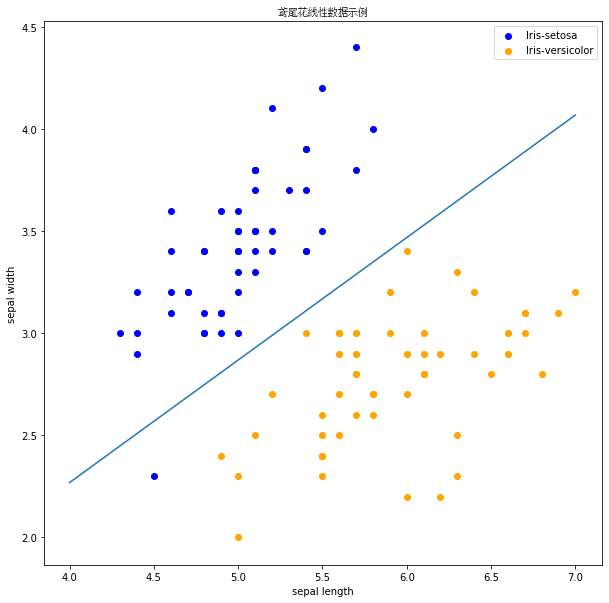

In [20]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例', fontproperties=font) # fontproperties=font

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

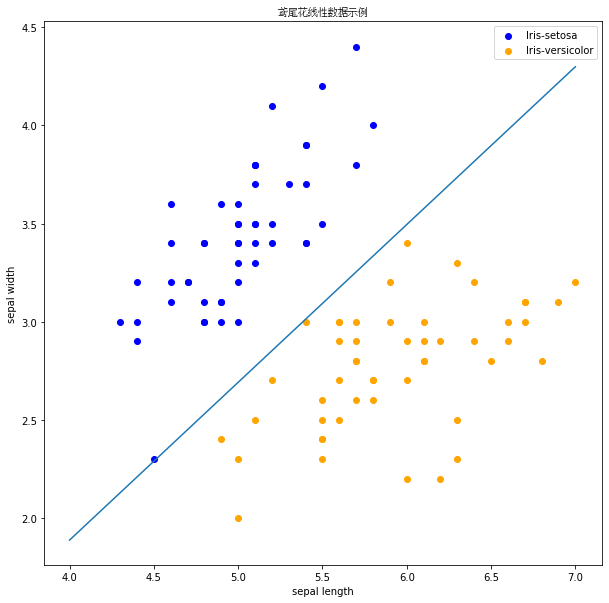

In [21]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)  # 不使用迭代差进行判断结束
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
# plt.rcParams['font.sans-serif']=['Noto Sans CJK SC']
# plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例', fontproperties=font)

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)